FLUX.1-dev
====

* Gated model: agree to the license terms to gain access

```bash
import sys
! {sys.executable} -m pip install diffusers
```

In [1]:
import torch
from diffusers import FluxPipeline

pipe = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-dev",
    torch_dtype=torch.bfloat16
)
pipe.enable_model_cpu_offload()
# save some VRAM by offloading the model to CPU.
# Remove this if you have enough GPU power

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [2]:
prompt = "A dog riding a bicycle in a park"

image = pipe(
    prompt,
    height=1024,
    width=1024,
    guidance_scale=3.5,
    num_inference_steps=50,
    max_sequence_length=512,
    generator=torch.Generator("cpu").manual_seed(0)
).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

In [3]:
image.size

(1024, 1024)

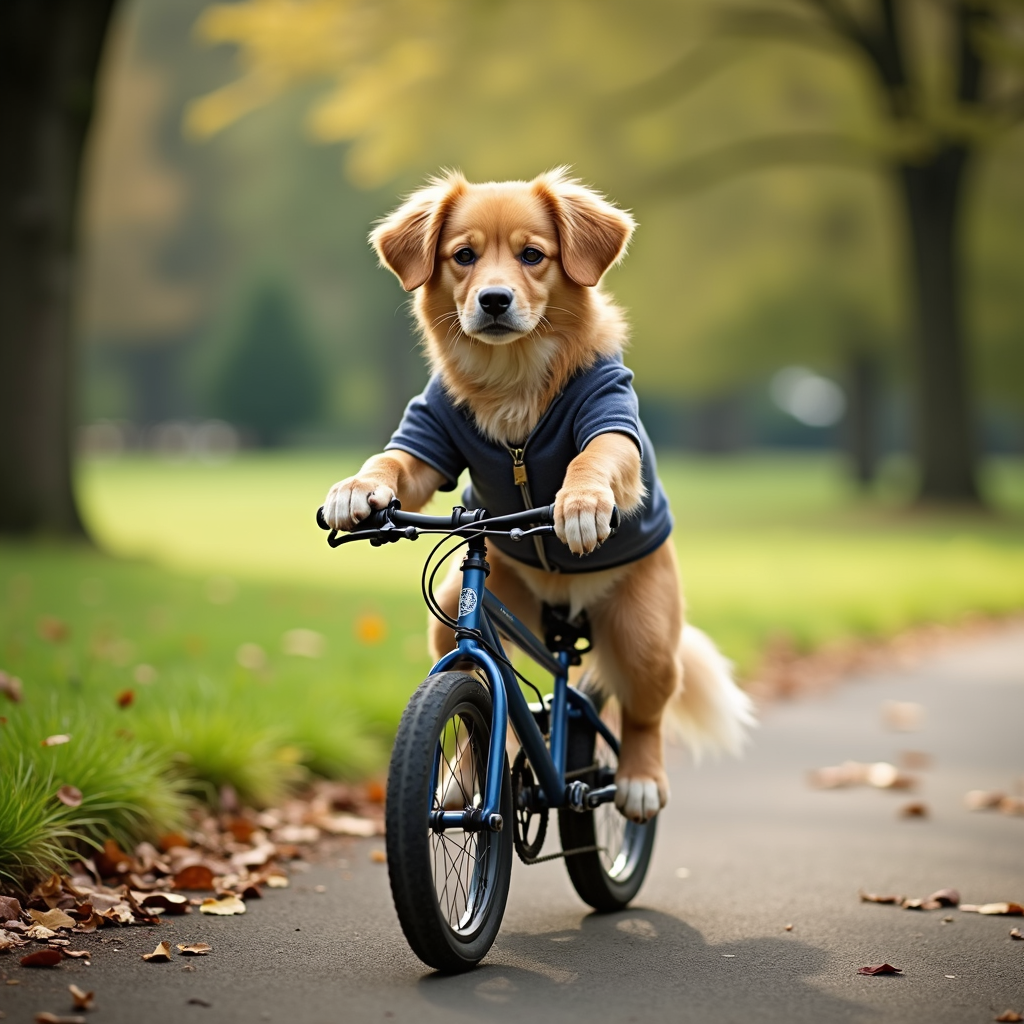

In [4]:
image